In [1]:
import sys
sys.path.append("../Pupillengröße/Skripte/")
#%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
#import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))
!pip install pyplr
!pip install neurokit2
!pip install fastnumbers
!pip install datamatrix
import sys
sys.path.append("../Pupillengröße/Skripte/")

import numpy as np
from pyplr import utils
import pandas as pd
from classPLRfromGitHub import PLR
from pyplr import graphing
from pyplr import preproc
from pyplr import utils


You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/Katharina/Desktop/Pupille/venv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import PLRpreprocessing
import plotting
import math
import os

importlib.reload(PLRpreprocessing)
importlib.reload(plotting)
#importlib.reload(checkdata)

if os.getlogin()=='marco':
    subject_id="PJ11_4_Ruhe"
    data_dir="/home/marco/Nextcloud/KatharinaBeispieldaten/"
else:
    subject_id="PJ15_1_PLR1"
    data_dir="/Users/Katharina/Desktop/Beispieldaten"

field="diameter_3d"
ts="pupil_timestamp"

ModuleNotFoundError: No module named 'plotting'

In [23]:
# define the patient ID for the dataframe and assign the 4 light strenghts
Light_strenght_1 = 1
Light_strenght_2 = 2
Light_strenght_3 = 3
Light_strenght_4 = 4



# Sampling frequency
SAMPLE_RATE = 120

# Columns to load
use_cols = ['confidence',
            'method',
            'pupil_timestamp',
            'eye_id',
            'diameter']

pupil_cols = ['diameter']

# Check if the pyplr_analysis directory exists
if not os.path.exists(os.path.join(data_dir, 'pyplr_analysis')):
    # Create the directory if it doesn't exist
    os.makedirs(os.path.join(data_dir, 'pyplr_analysis'))

# Get a handle on a subject
s = utils.new_subject(
    data_dir, export='000', out_dir_nm='pyplr_analysis')


************************************************************
********************** Beispieldaten ***********************
************************************************************


[Errno 2] No such file or directory: '/Users/Katharina/Desktop/Beispieldaten/exports/000/pupil_positions.csv'
[Errno 2] No such file or directory: '/Users/Katharina/Desktop/Beispieldaten/exports/000/pupil_positions.csv'


TypeError: 'NoneType' object is not subscriptable

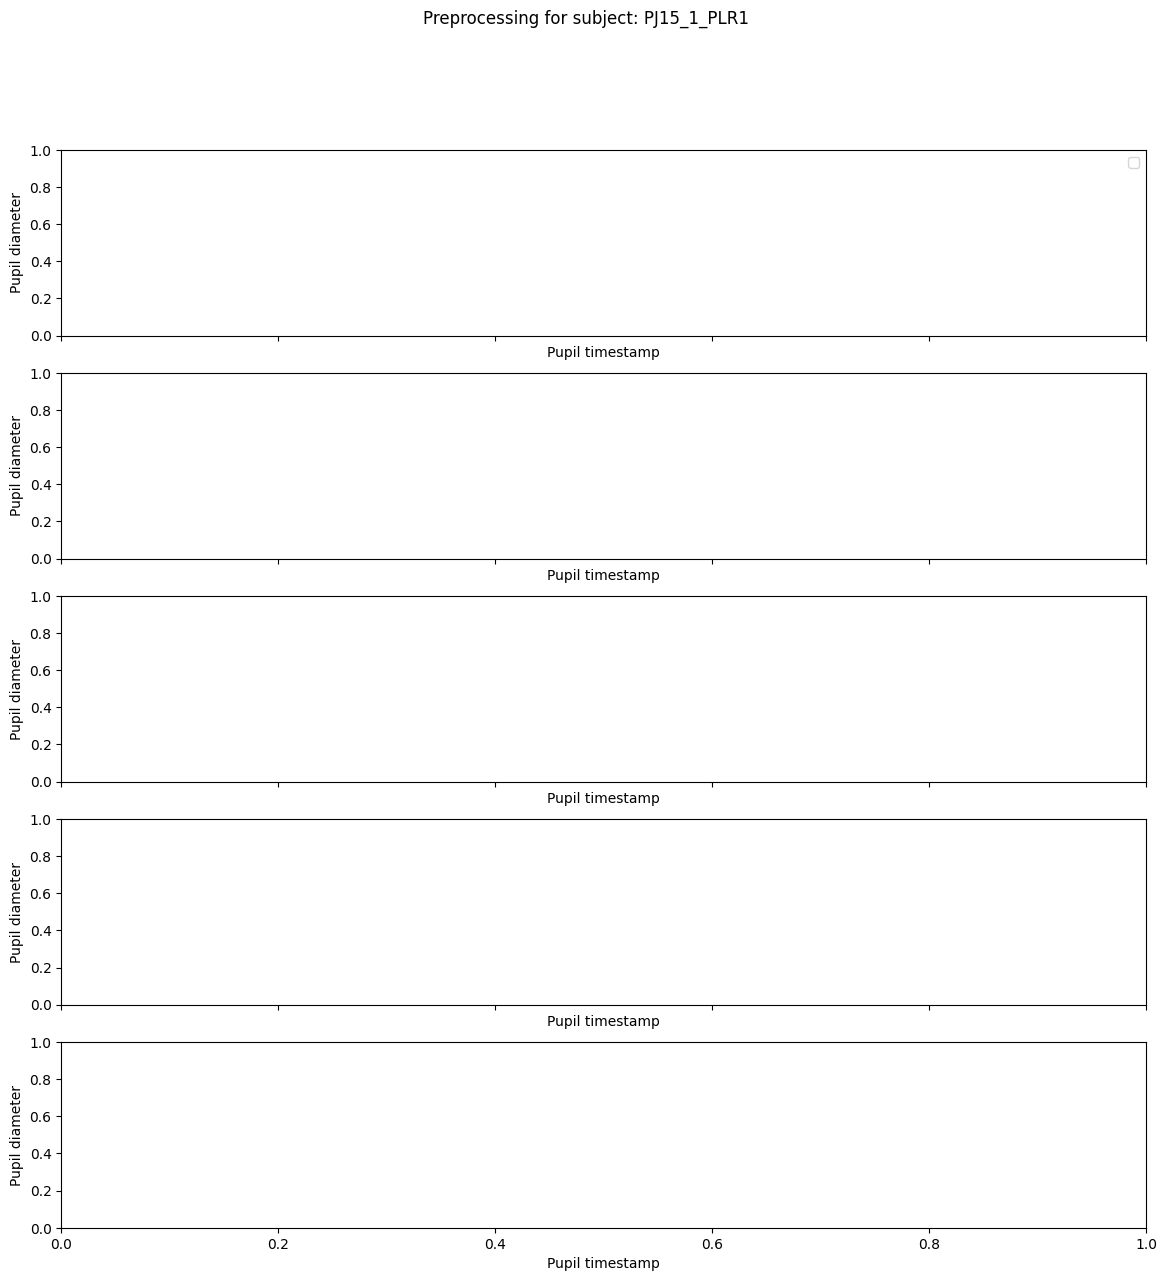

In [28]:
# Load pupil data, method has to be changed to '3d' otherwise multiple repeat error
#eye_id=best takes the eye with the best confidence, eye_id=0 takes right, 1 takes left
samples = utils.load_pupil(
    s['data_dir'], eye_id='left', method='2d', cols=use_cols)
samples

# Sampling frequency
SAMPLE_RATE = 120


# load the pupil data for the current combination of eye_id and method
samples = utils.load_pupil(s['data_dir'], eye_id='left', method='2d', cols=use_cols)

# Make figure for processing, append figure to pupil_preprocessing
f, axs = graphing.pupil_preprocessing_figure(nrows=5, subject=f"{subject_id}" )
# Plot the raw data
# Plot the raw data
samples[pupil_cols].plot(title=f"{subject_id}_left_2d", ax=axs[0], legend=True)
axs[0].legend(loc='center right', labels=['pixels'])
# Mask first derivative
#Default is a threshold of 3 SD from the mean first derivate
# If there are a lot of blinks the mean first derivate is higher
# Therefore set the threshold lower 
samples = preproc.mask_pupil_first_derivative(
    samples, threshold=3.0, mask_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Masked 1st deriv (3*SD)', ax=axs[1], legend=False)

# Mask confidence
samples = preproc.mask_pupil_confidence(
    samples, threshold=0.8, mask_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Masked confidence (<0.8)', ax=axs[2], legend=False)

# Interpolate
samples = preproc.interpolate_pupil(
    samples, interp_cols=pupil_cols)
samples[pupil_cols].plot(
    title='Linear interpolation', ax=axs[3], legend=False)

# Smooth
samples = preproc.butterworth_series(
    samples, fields=pupil_cols, filt_order=3,
    cutoff_freq=4/(SAMPLE_RATE/2))
samples[pupil_cols].plot(
    title='3rd order Butterworth filter with 4 Hz cut-off',
    ax=axs[4], legend=False);

events = utils.load_annotations(s['data_dir'])
events

<module 'plotting' from '/Users/Katharina/Desktop/Pupille/notebooks/plotting.py'>

'Starting process2'

'Loop through each annotation timestamp and slice the data'

'Label the data'

'preprocess and slice data'

'nanp before=50.0, nanp after=1.6256714729997173'

'nanp before=50.0, nanp after=1.659103800340329'

'nanp before=50.0, nanp after=1.1619668414340372'

'nanp before=50.0, nanp after=1.6527166974038872'

'nanp before=50.0, nanp after=1.217081850533808'

'nanp before=50.0, nanp after=0.007196315486470927'

'nanp before=50.0, nanp after=0.9400370317618573'

'nanp before=50.0, nanp after=1.5259048970901348'

'nanp before=50.0, nanp after=0.9997163925127623'

'nanp before=50.0, nanp after=0.30578865026312047'

'nanp before=50.0, nanp after=0.007090187180941577'

'nanp before=50.0, nanp after=0.8284945475145163'

'nanp before=50.0, nanp after=0.014158289678606824'

'nanp before=50.0, nanp after=2.8920944703719416'

'nanp before=50.0, nanp after=0.03566842630903125'

'nanp before=50.0, nanp after=0.0070921985815602835'

'nanp before=50.0, nanp after=0.007085163667280714'

'nanp before=50.0, nanp after=1.9437376307605316'

'nanp before=50.0, nanp after=0.014128284826222097'

'nanp before=50.0, nanp after=0.7172276665246414'

ProcessResult(config=ProcessConfig(eyenum=0, column='diameter_3d', sfactor=1000, data_path='/Users/Katharina/Desktop/Beispieldaten', subject_id='PJ15_1_Ruhe', condition='30Placebo', timebase='30', stime_time_offset=0, after_var_start_offset=29, window_duration=59, upper_threshold=9, lower_threshold=1.5, nan_reconstruct_threshold=0, nan_before_threshold=60, nan_after_threshold=5, noise_threshold_factor=6, noise_rejection_percent=2, validate_only=False), frames=[ProcessFrame(annotation_ts=28344.482733, valid=True, stage='time_slot', remark='', data=       pupil_timestamp  world_index  eye_id  confidence  norm_pos_x   
8878      28343.485855          575       0    1.000000    0.540870  \
8879      28343.485855          575       0    1.000000    0.540942   
8882      28343.494036          575       0    0.977441    0.540841   
8883      28343.494036          575       0    0.977441    0.540752   
8886      28343.502001          576       0    0.990696    0.540749   
...                ..

'Anzahl der Messungen: 20'

Text(0.5, 1.0, 'Histogram of Mean Values')

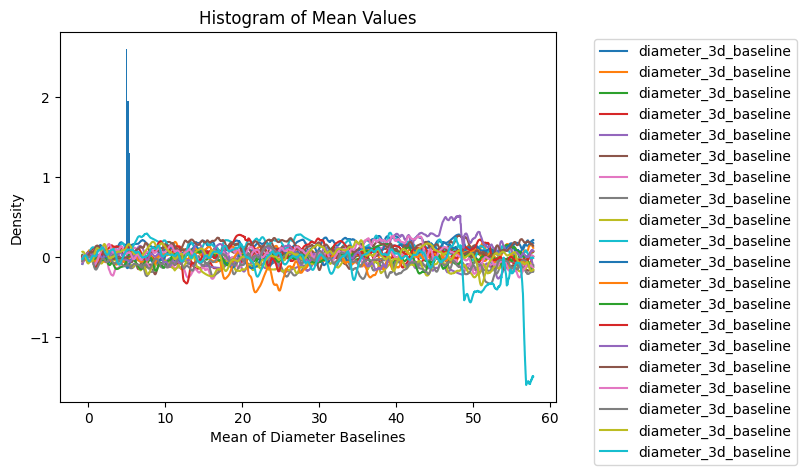

In [19]:

def plot(df,text,xcol,ycol):
    plotting.plot_preprocessed(df,text,xcol,ycol)
    
def noplot(df,text,xcol,ycol):
    pass


if os.getlogin()=='marco':
    subject_id="PJ11_4_Ruhe"
    data_dir="/home/marco/Nextcloud/KatharinaBeispieldaten/"
else:
    subject_id="PJ15_1_PLR1"
    data_dir="/Users/Katharina/Desktop/Beispieldaten"

field="diameter_3d"
ts="pupil_timestamp"

config=PLRpreprocessing.create_process_config(0,field,subject_id,data_dir)

# Set this to False, if you want to process the data
# Set this to True, if you only want to return an array of data checks 

#config.validate_only=True

eye0=PLRpreprocessing.process(config,display)
display(eye0)

if False:
    if config.validate_only:
        # no data, just a structure containing annotation indices and error estimates
        display(eye0) 
    else:
        for what_pf in eye0.frames:
            if what_pf.valid:
                what=what_pf.data
                ts=what['pupil_timestamp'].iloc[0]
                plot(what,f"frame @{ts}","pupil_timestamp_based",f"{field}_original")
                plot(what,f"gated @{ts}","pupil_timestamp_based",f"{field}_gated")
                plot(what,f"recon @{ts}","pupil_timestamp_based",f"{field}_rec")
                plot(what,f"interp @{ts}","pupil_timestamp_based",f"{field}_rec_interp_100")

        if True:
            for what_pf in eye0.frames:
                if what_pf.valid:
                    what=what_pf.data
                plotting.plot_preprocessed(what,f"frame @what.pupil_timestamp[0]","pupil_timestamp_based",f"{field}_gated")


display(f"Anzahl der Messungen: {len(eye0.frames)}")
sub=None
i=0
for what_pf in eye0.frames:
    #display(what_pf)
    if what_pf.valid:
        what=what_pf.data
        preprocessing.create_baseline_column(what, f'{field}_original',f'{field}_original_baseline')
        sub=what.plot(ax=sub, x='pupil_timestamp_based', y=[f'{field}_baseline'], ylabel='baseline adjusted pupil size', kind='line')
        sub.set_ylabel(f'measurement {subject_id}, {field}')
         # Adjust the position of the legend
        legend = sub.legend()
        legend.set_bbox_to_anchor((1.5, 1))  # Adjust the position of the legend box

        
import matplotlib.pyplot as plt

mean_values = []  # List to store the mean values
for what_pf in eye0.frames:
    what=what_pf.data
    mean_time_slot_0 = what.loc[what['time_slot'] == 0, f'{field}'].mean()
    mean_values.append(mean_time_slot_0)  # Append mean value to the list

# Plotting the histogram
plt.hist(mean_values, bins='auto', density=True)

plt.xlabel('Mean of Diameter Baselines')
plt.ylabel('Density')
plt.title('Histogram of Mean Values')



In [ ]:
### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

In [133]:
preprocessing.save_pickle("hello.pickle",eye0)


In [117]:
f=preprocessing.load_pickle("hello.pickle")

In [120]:
display(len(f.frames))

41

Hallo *wie gehts*

In [123]:
display(eye0)

ProcessResult(config=ProcessConfig(eyenum=0, column='diameter', sfactor=1, data_path='/home/marco/Nextcloud/KatharinaBeispieldaten/', subject_id='PJ11_4_Ruhe', condition='3.4Stim', timebase='3.4', start_time_offset=0, end_time_offset=0, window_duration=29, upper_threshold=150, lower_threshold=40, nan_reconstruct_threshold=30, noise_threshold_factor=16, noise_rejection_percent=20, validate_only=False))